# Code 2: Exploratory Analysis of Bayesian Models - Exercises

```{admonition} This is a reference notebook for the book Bayesian Modeling and Computation in Python
:class: tip, dropdown
The textbook is not needed to use or run this code, though the context and explanation is missing from this notebook.

If you'd like a copy it's available
[from the CRC Press](https://www.routledge.com/Bayesian-Modeling-and-Computation-in-Python/Martin-Kumar-Lao/p/book/9780367894368)
or from [Amazon](https://www.routledge.com/Bayesian-Modeling-and-Computation-in-Python/Martin-Kumar-Lao/p/book/9780367894368).
``

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc3 as pm
from scipy import stats
import theano.tensor as tt
from plotnine import *

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 100
np.random.seed(5201)

### 2E1
+ prior predictive checks are used to check that the prior parameters are "sensible" enough so that the model can produce predictions that cover any expected set of predictions. They should provide the model with enough flexibility to all ow the data to shift the priors, but not so much flexibility that the data cannot "speak" to the model.
+ posterior predictive checks are used to check that the predictive data produced by the model is a reasonable fit to the actual data

### 2E2
+ ESS - Effective sample size. The sample size that is left after non-iid samples have been removed from the poterior predictive distribution.
+ Rhat - A measure of the similarity between chains. Rhat should be close to 1. If not, at least one of the chains has in effect sampled from a different distribution to the others.
+ MCSE - Monte Carlo Standard Error - The theoretical posterior may be infinite, but we can only sample a finite number of draws from the posterior. This introduces a potential error which is quantified by MCSE. Requires domain expertise to interpret. If we want a parameter to be accurate to the second decimal, the mcse should be below the second decimal. Only needs to be checked after ESS and Rhat are good enough.

### 2E3

In [3]:
centered8 = az.load_arviz_data("centered_eight")
centered8

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

In [4]:
# 1. list groups
centered8.groups

<bound method InferenceData.groups of Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data>

In [5]:
# 2. number of chains
centered8.posterior.dims['chain']

4

In [6]:
# 2 total number posterior samples
centered8.posterior.dims['chain'] * centered8.posterior.dims['draw']  * centered8.posterior.dims['school']

16000

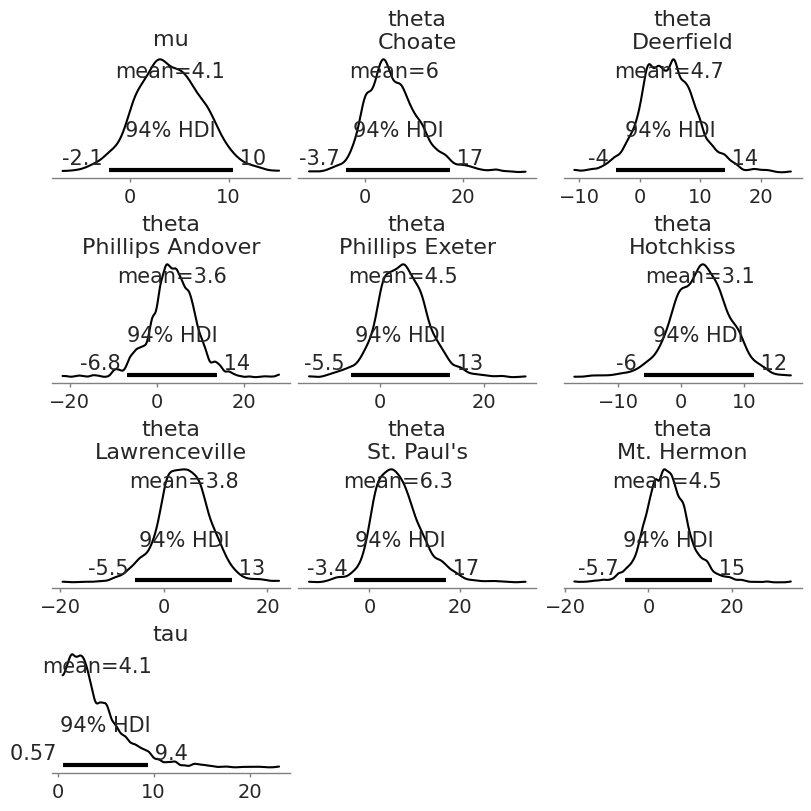

In [7]:
# 3 plot posterior
az.plot_posterior(centered8, figsize=(8, 8));

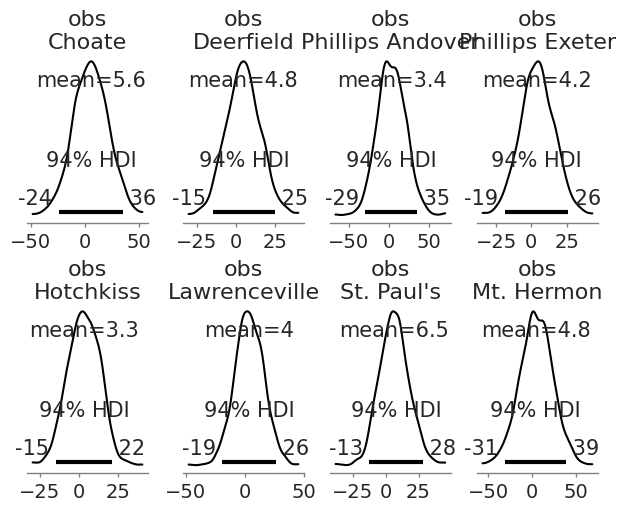

In [8]:
# 4 plot posterior predictive
az.plot_posterior(centered8.posterior_predictive, figsize=(6, 5));

In [9]:
# 5. Calculate the estimated mean of the parameters, and the Highest Density Intervals.
keepers = ['mean', 'hdi_3%', 'hdi_97%']
az.summary(centered8.posterior_predictive).set_index(centered8.posterior_predictive.coords['school'].to_series())[keepers]

,mean,hdi_3%,hdi_97%
school,,,
Choate,5.581,-23.889,35.768
Deerfield,4.814,-14.637,25.296
Phillips Andover,3.429,-29.275,34.572
Phillips Exeter,4.194,-18.636,26.232
Hotchkiss,3.291,-14.837,21.694
Lawrenceville,3.986,-18.939,26.212
St. Paul's,6.459,-12.632,28.168
Mt. Hermon,4.787,-31.127,39.329


In [10]:
### 2E4
nonce8 = az.load_arviz_data("non_centered_eight")
nonce8

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

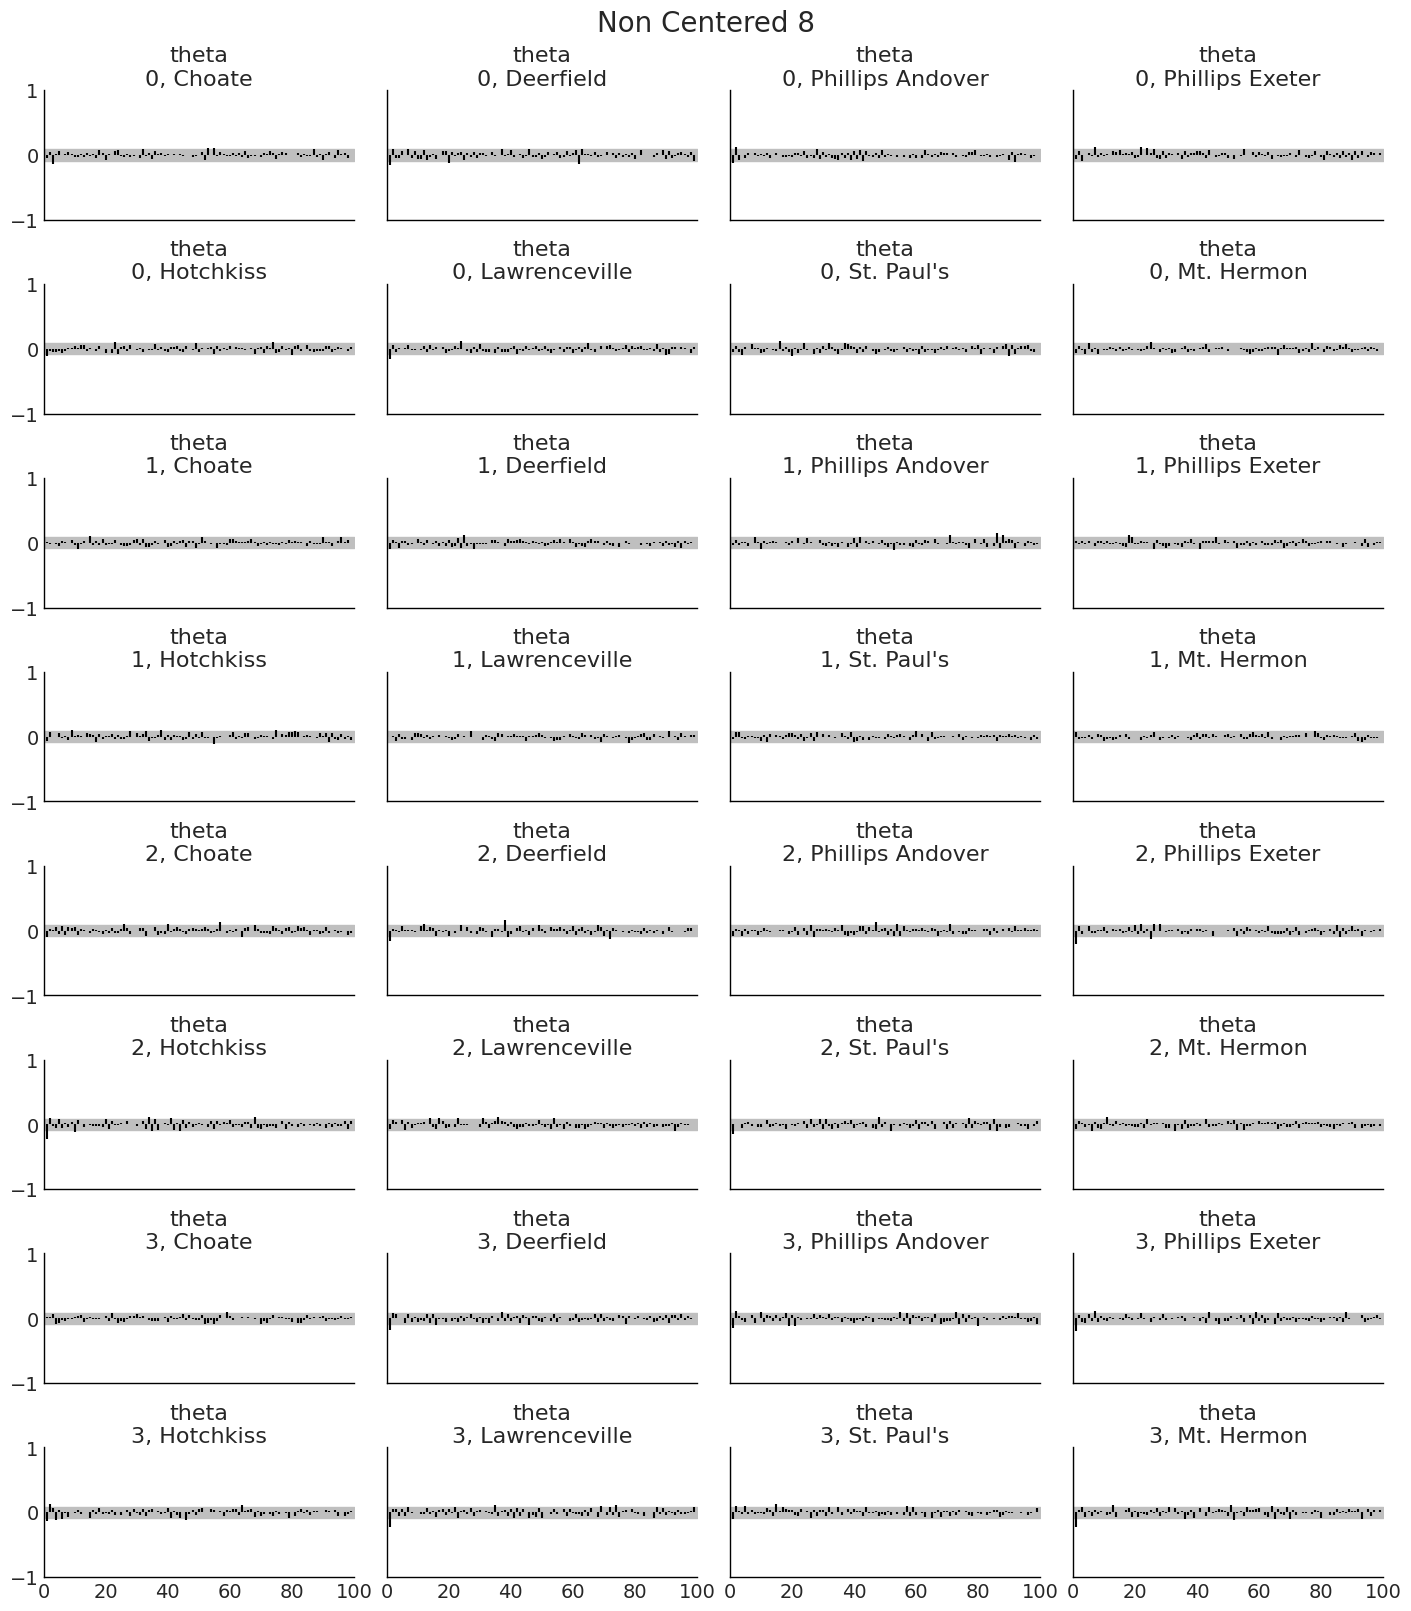

In [11]:
az.plot_autocorr(nonce8, var_names = ['theta'], figsize=(14, 16));
plt.suptitle("Non Centered 8", fontsize=20);

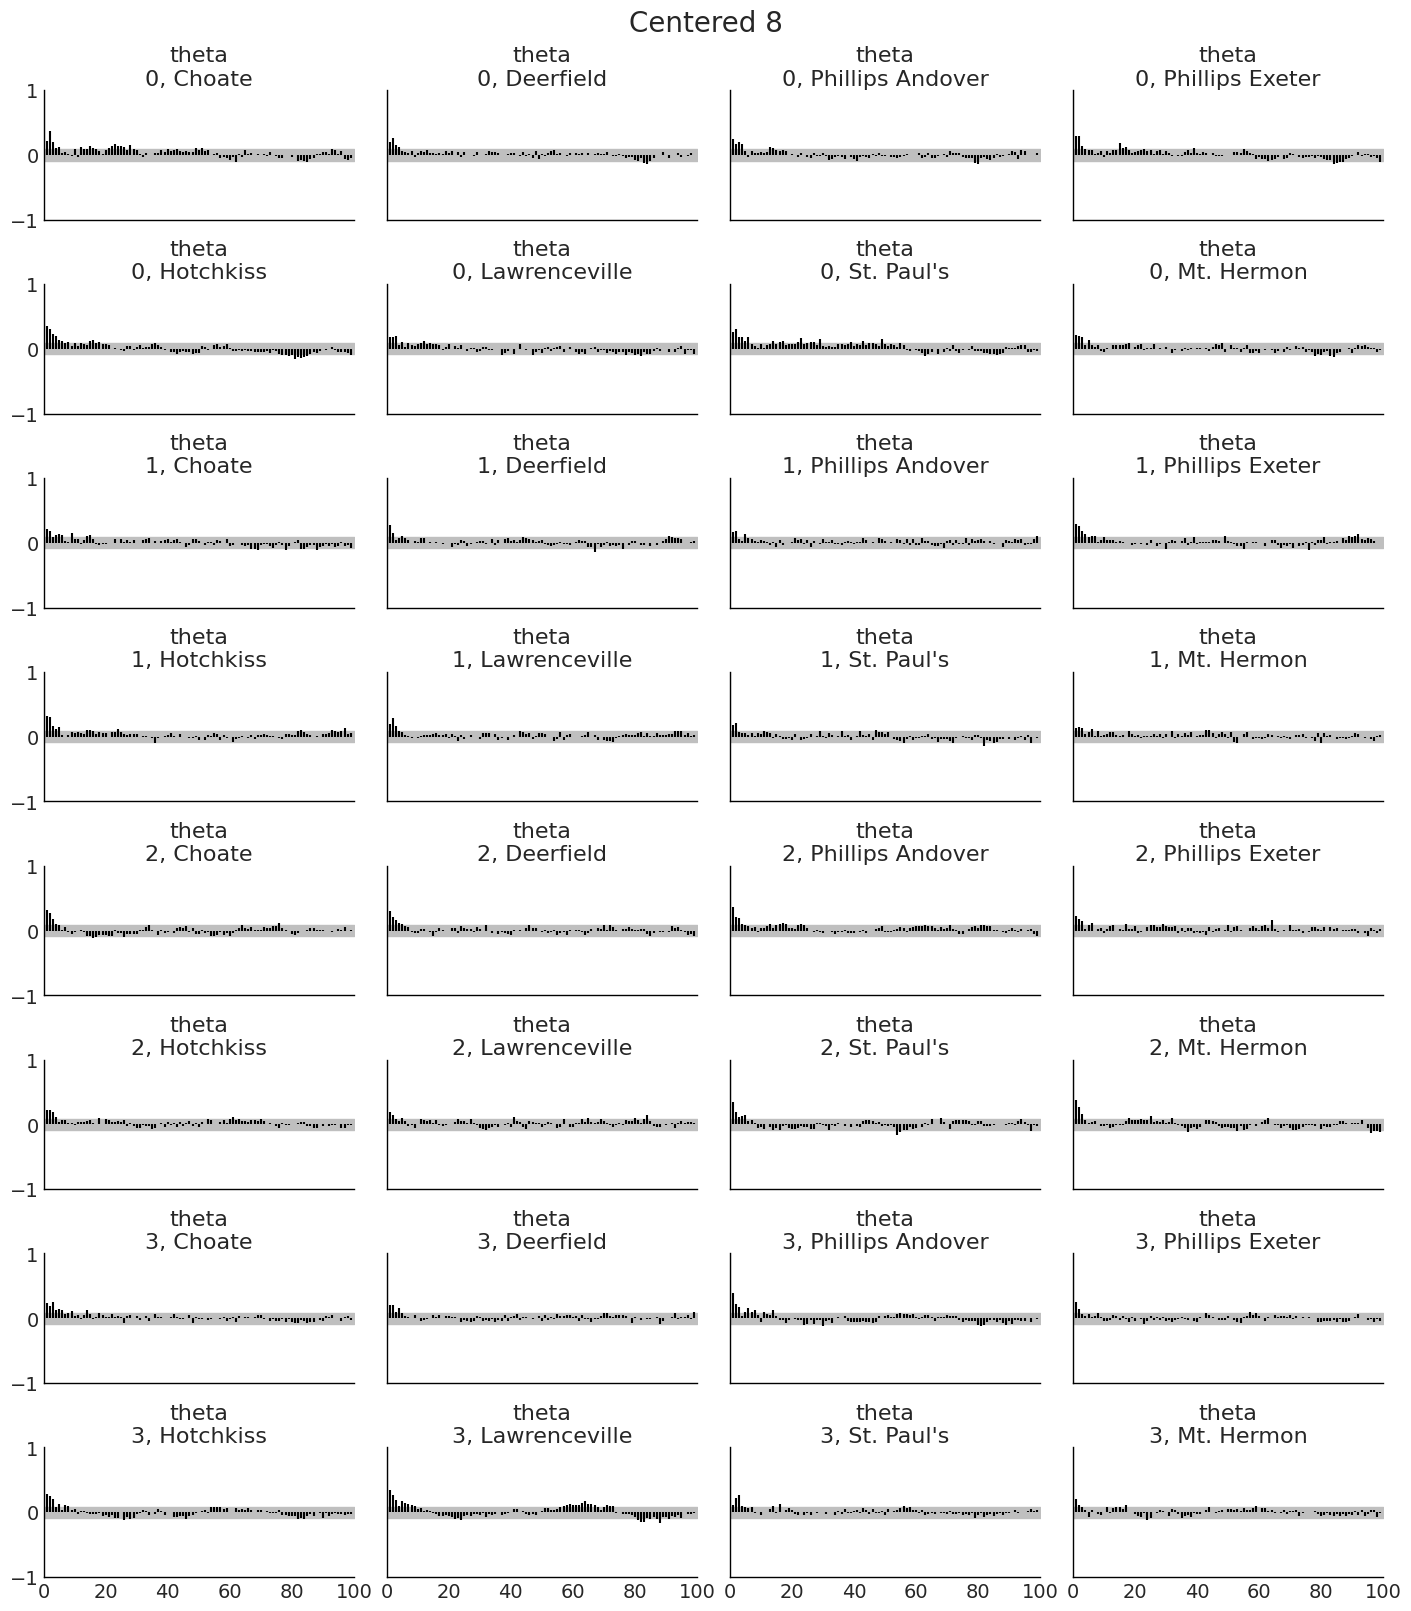

In [12]:
az.plot_autocorr(centered8, var_names = ['theta'], figsize=(14, 16));
plt.suptitle("Centered 8", fontsize=20);

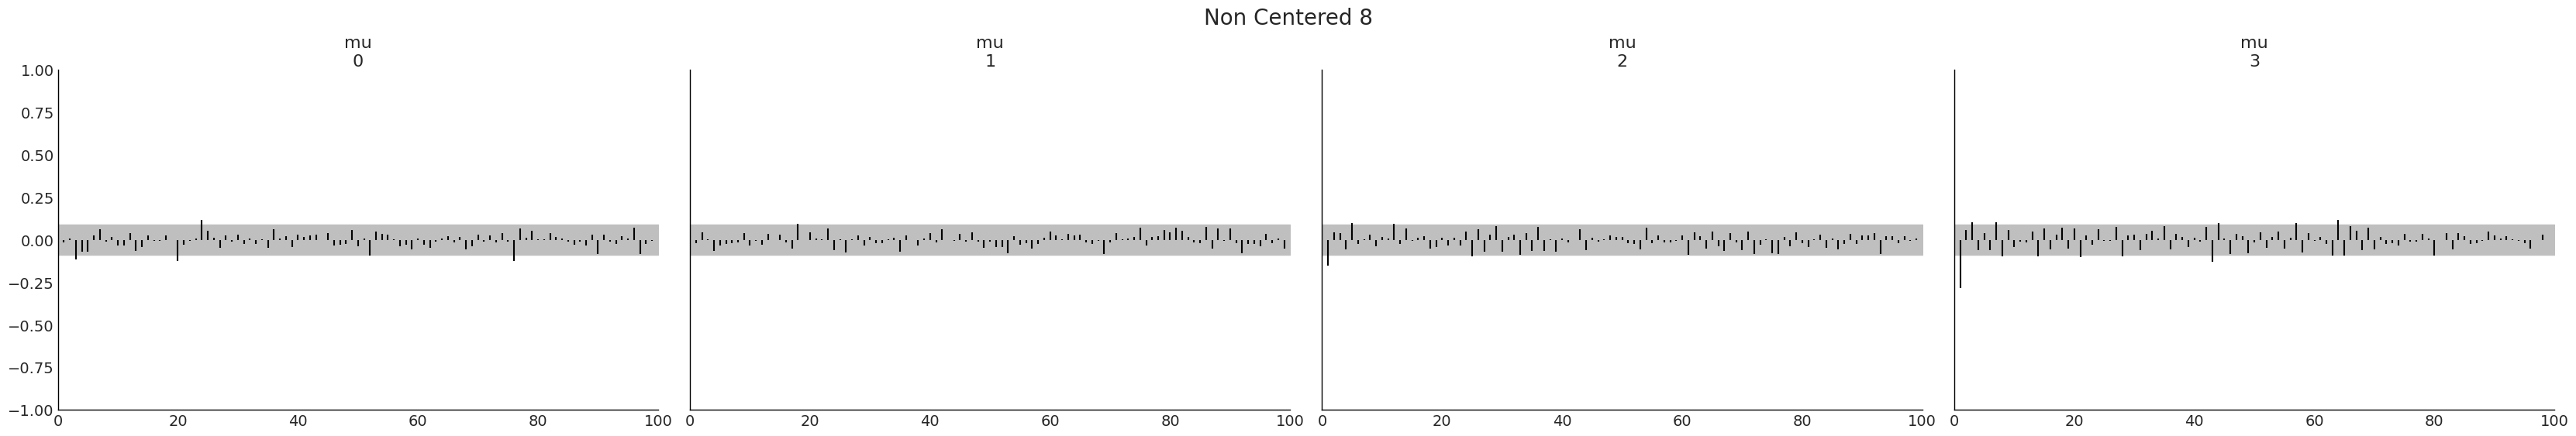

In [13]:
az.plot_autocorr(nonce8, var_names = ['mu']);
plt.suptitle("Non Centered 8", fontsize=20);

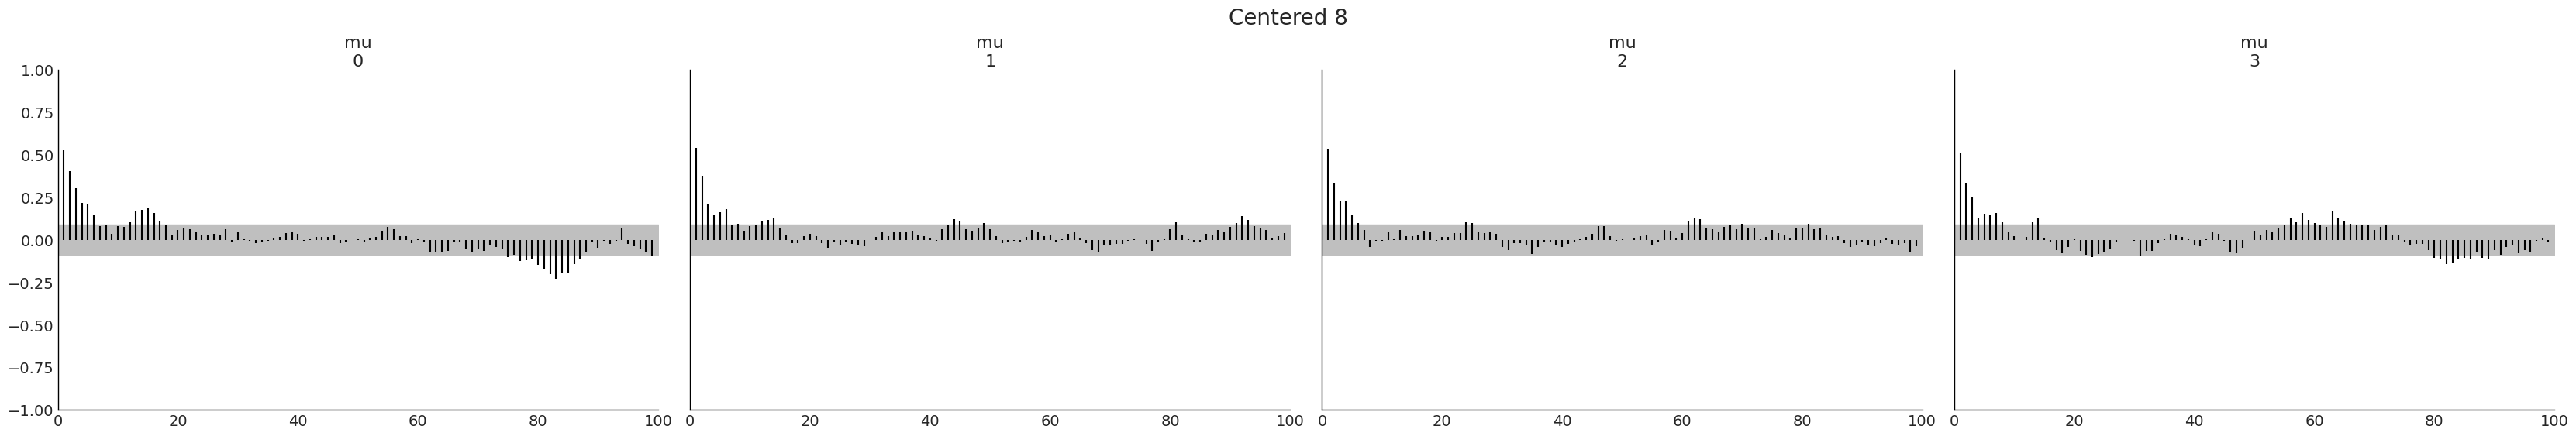

In [14]:
az.plot_autocorr(centered8, var_names = ['mu']);
plt.suptitle("Centered 8", fontsize=20);

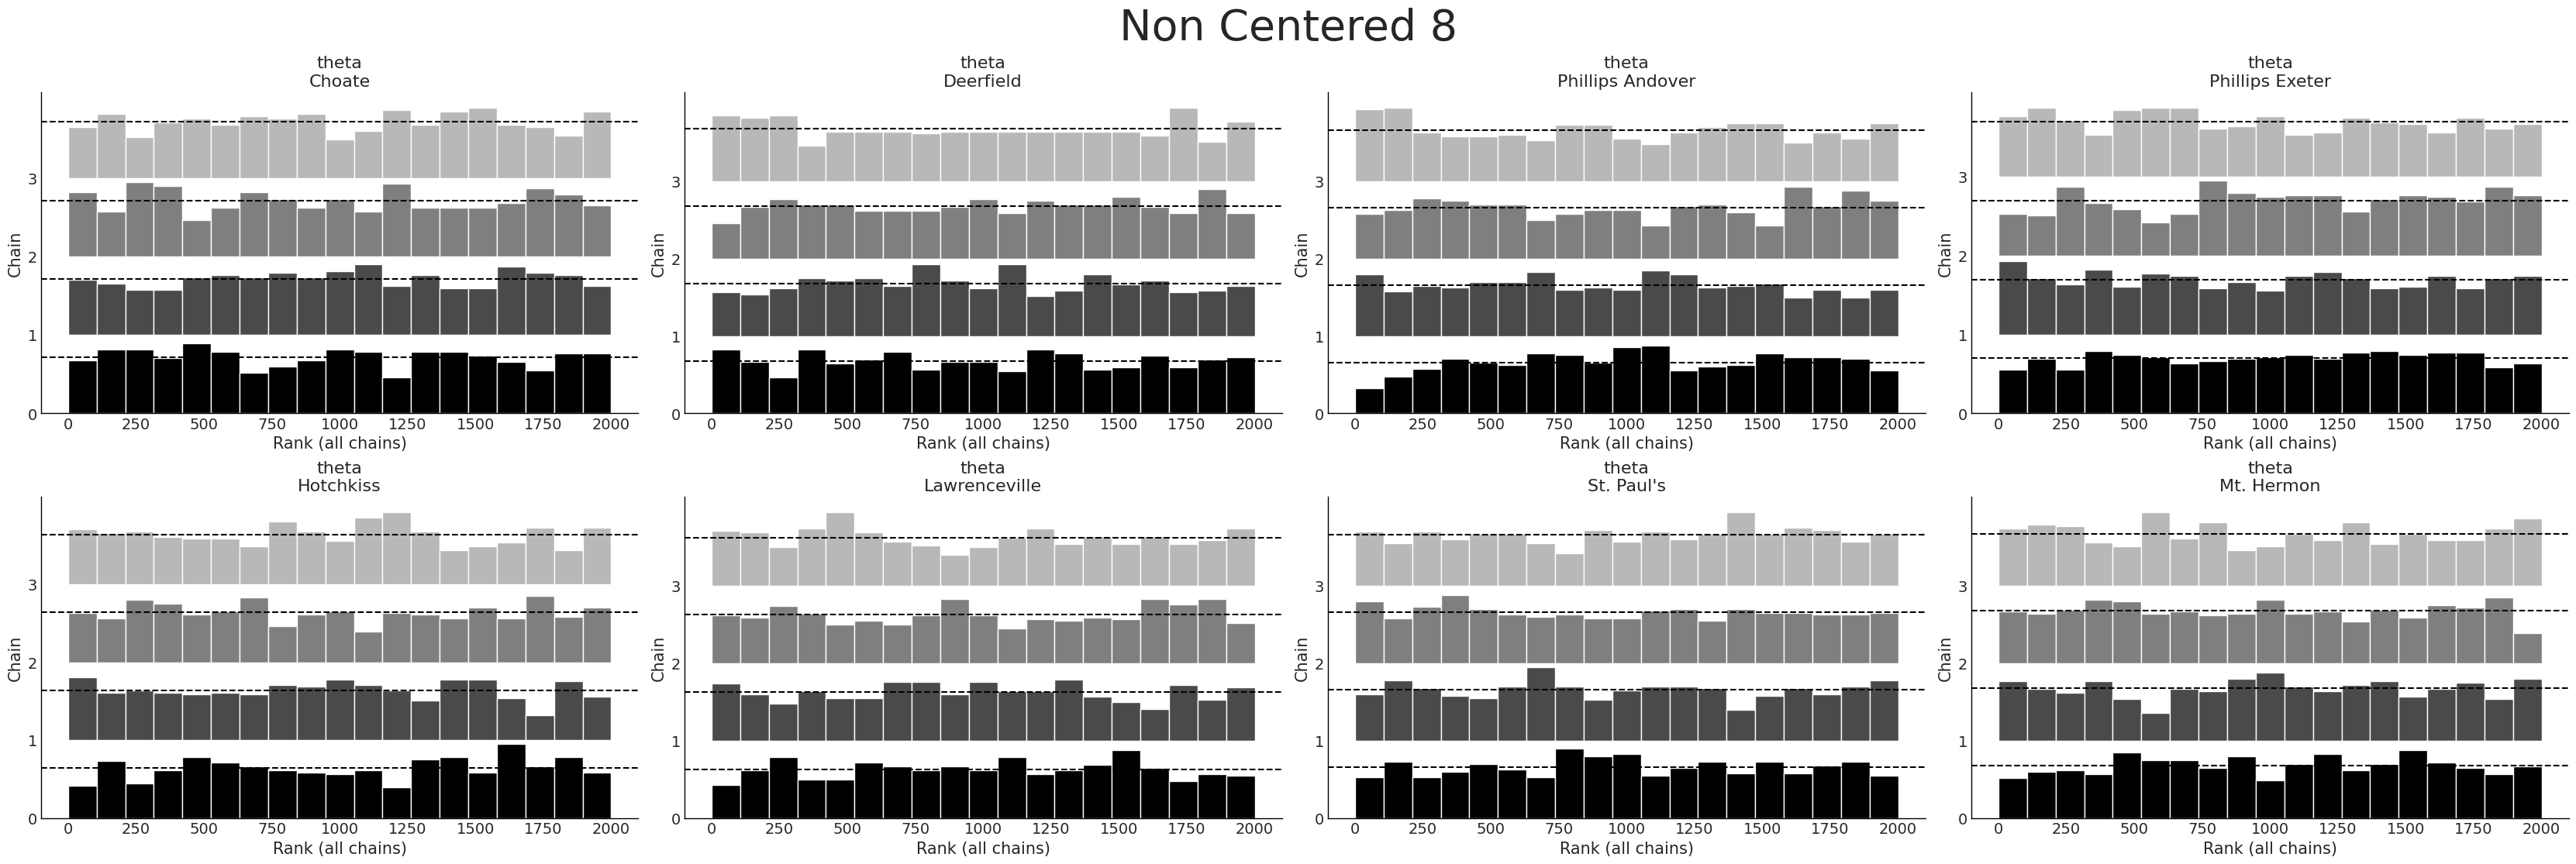

In [15]:
az.plot_rank(nonce8, var_names = ['theta']);
plt.suptitle("Non Centered 8", fontsize=40);

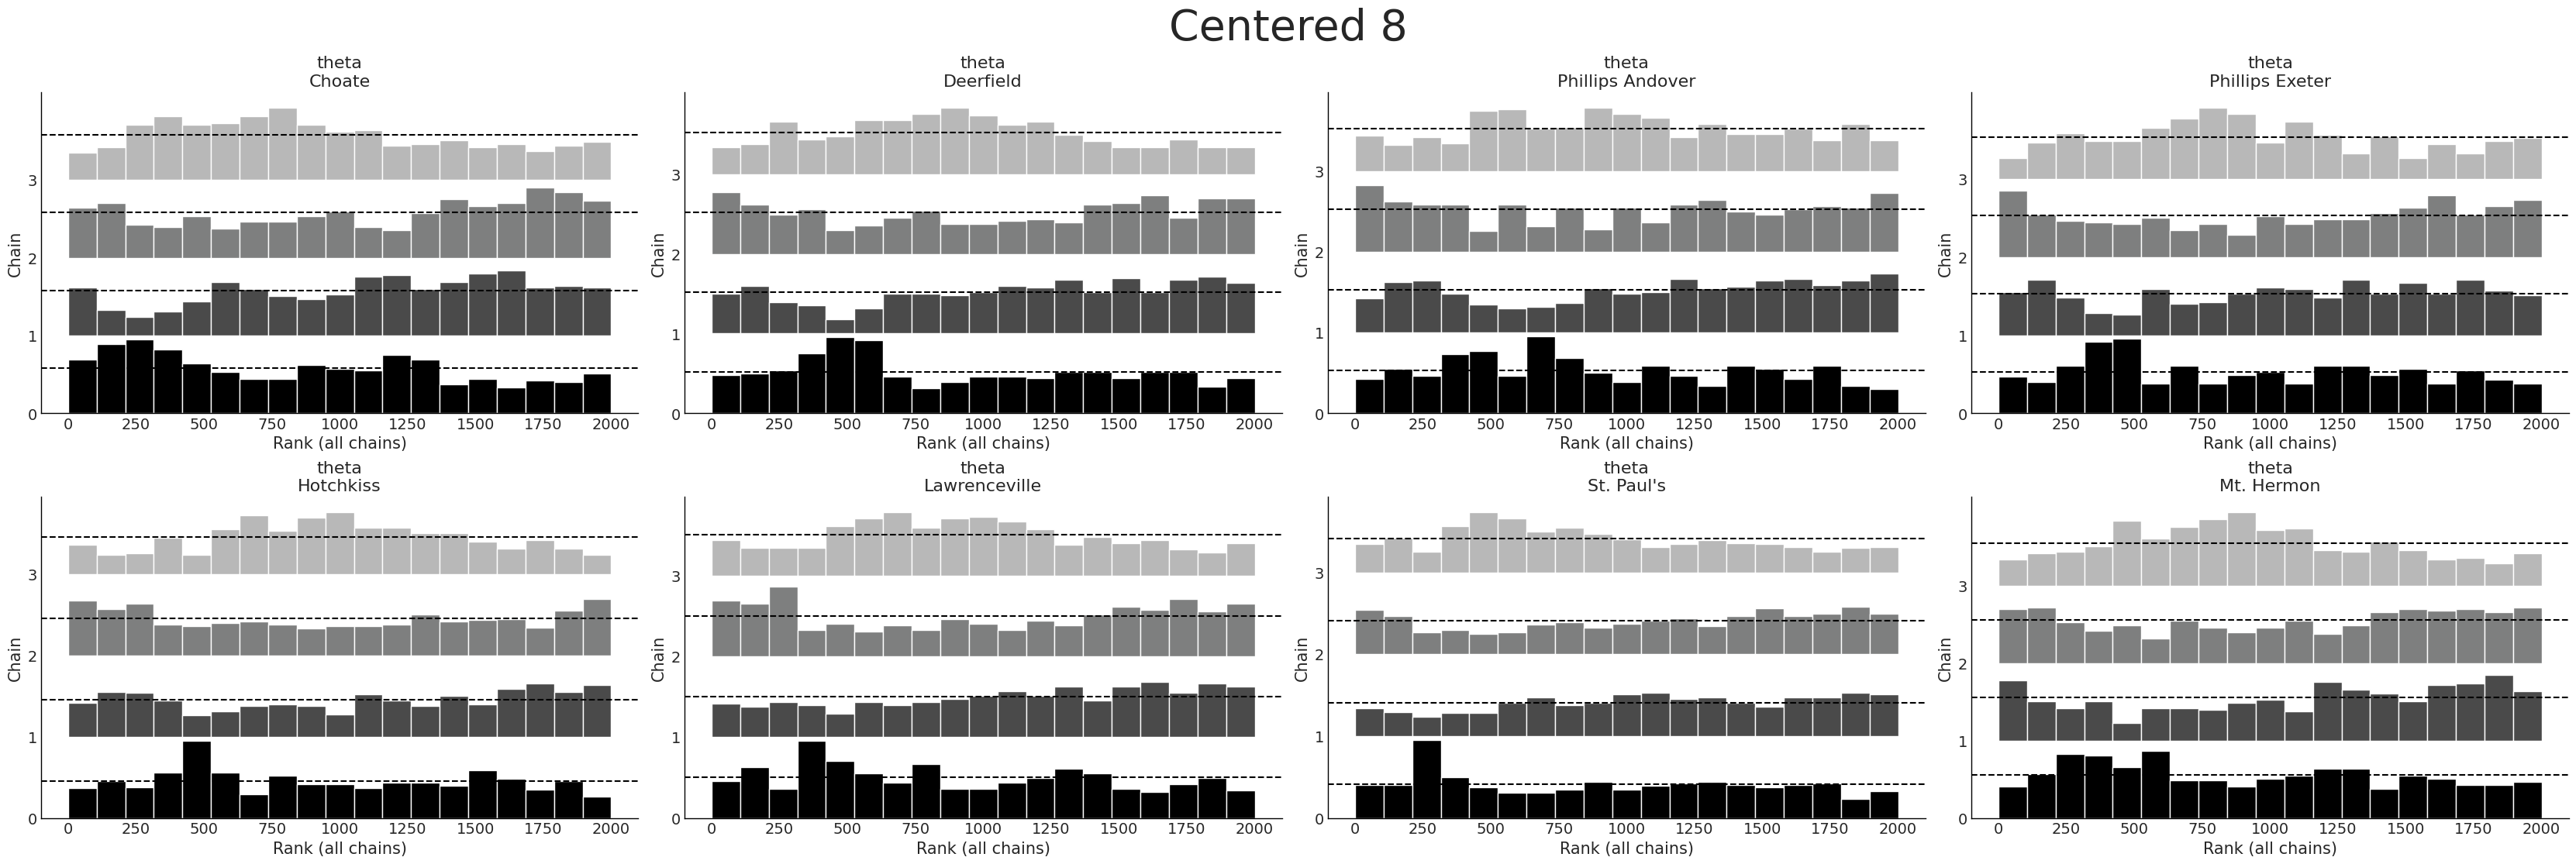

In [16]:
az.plot_rank(centered8, var_names = ['theta']);
plt.suptitle("Centered 8", fontsize=40);

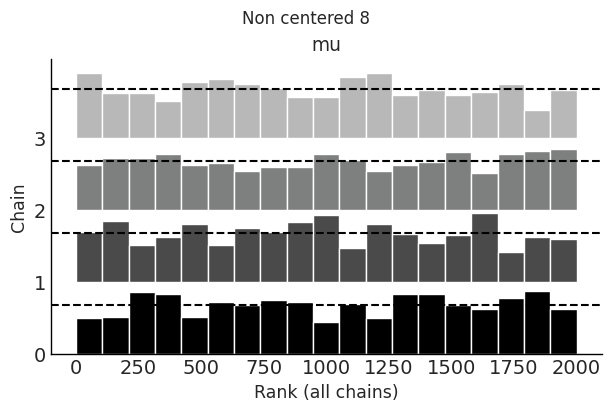

In [17]:
az.plot_rank(nonce8, var_names = ['mu'], figsize=(6, 4));
plt.suptitle("Non centered 8");

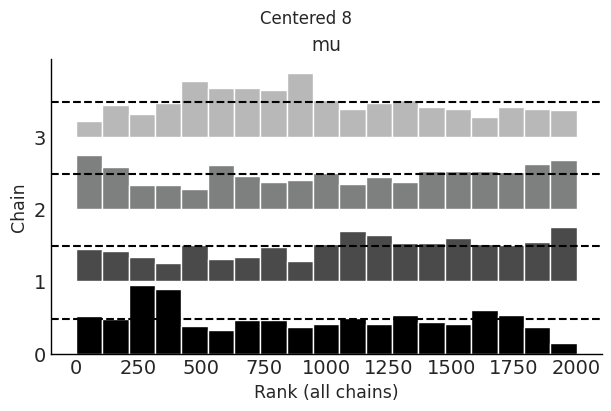

In [18]:
az.plot_rank(centered8, var_names = ['mu'], figsize=(6, 4));
plt.suptitle("Centered 8");

In [19]:
print('Non Centered 8')
az.rhat(nonce8).to_dataframe()

Non Centered 8


,mu,theta_t,tau,theta
school,,,,
Choate,1.00014,1.000842,1.000757,1.000978
Deerfield,1.00014,1.002431,1.000757,1.001082
Phillips Andover,1.00014,1.004294,1.000757,1.007981
Phillips Exeter,1.00014,1.000434,1.000757,1.001268
Hotchkiss,1.00014,0.999895,1.000757,1.000476
Lawrenceville,1.00014,1.000008,1.000757,1.001646
St. Paul's,1.00014,0.999963,1.000757,1.000984
Mt. Hermon,1.00014,1.005695,1.000757,1.000877


In [20]:
print('Centered 8')
az.rhat(centered8).to_dataframe()

Centered 8


,mu,theta,tau
school,,,
Choate,1.027252,1.018111,1.070728
Deerfield,1.027252,1.015461,1.070728
Phillips Andover,1.027252,1.012551,1.070728
Phillips Exeter,1.027252,1.013911,1.070728
Hotchkiss,1.027252,1.020072,1.070728
Lawrenceville,1.027252,1.016397,1.070728
St. Paul's,1.027252,1.015743,1.070728
Mt. Hermon,1.027252,1.013686,1.070728


In [21]:
print('Non Centered 8')
az.ess(nonce8).to_dataframe()

Non Centered 8


,mu,theta_t,tau,theta
school,,,,
Choate,2353.635769,2214.874995,1268.126411,2298.254873
Deerfield,2353.635769,3158.557465,1268.126411,2433.871021
Phillips Andover,2353.635769,2926.375410,1268.126411,2275.995970
Phillips Exeter,2353.635769,2515.414356,1268.126411,2518.525306
Hotchkiss,2353.635769,2312.518484,1268.126411,2386.257704
Lawrenceville,2353.635769,2553.037256,1268.126411,2369.159593
St. Paul's,2353.635769,2677.844605,1268.126411,2173.588838
Mt. Hermon,2353.635769,2522.387126,1268.126411,2277.626462


In [22]:
print('Centered 8')
az.ess(centered8).to_dataframe()

Centered 8


,mu,theta,tau
school,,,
Choate,250.316415,347.832282,78.965017
Deerfield,250.316415,471.410683,78.965017
Phillips Andover,250.316415,463.213968,78.965017
Phillips Exeter,250.316415,502.686682,78.965017
Hotchkiss,250.316415,380.306455,78.965017
Lawrenceville,250.316415,516.172741,78.965017
St. Paul's,250.316415,402.038786,78.965017
Mt. Hermon,250.316415,449.410356,78.965017


### 2E5

### 2M11

In [23]:
with pm.Model() as model:
    mu = pm.Gamma('mu', 0.5, 0.00001)
    score = pm.Poisson('score', mu)
    prior = pm.sample_prior_predictive()
    azobj = az.from_pymc3(prior=prior)
azobj    

Inference data with groups:
	> prior

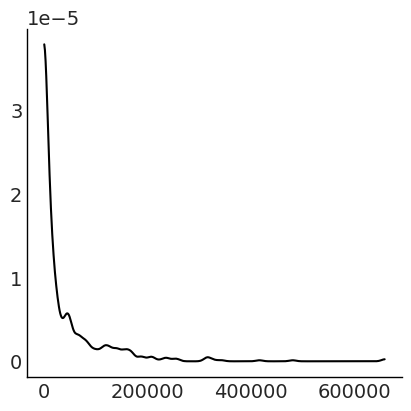

In [24]:
az.plot_dist(azobj.prior['mu'], figsize=(4, 4));

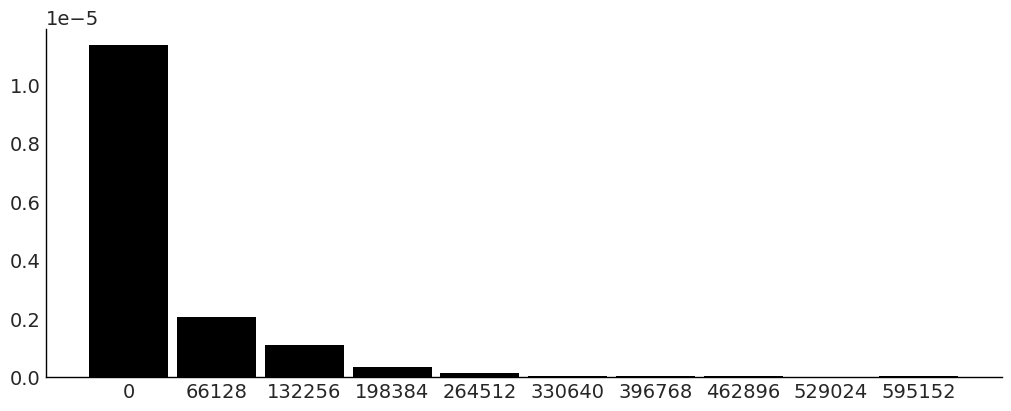

In [25]:
az.plot_dist(azobj.prior['score'], figsize=(10, 4));

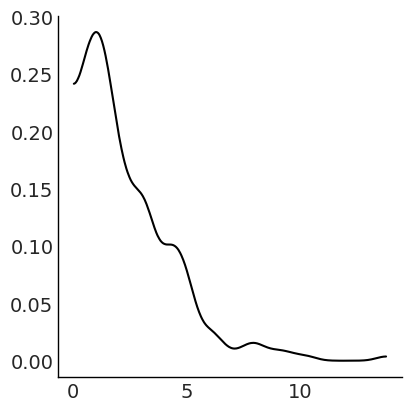

In [26]:
with pm.Model() as model:
    mu = pm.Gamma('mu', 1.5, 0.6)
    score = pm.Poisson('score', mu)
    prior = pm.sample_prior_predictive()
    azobj = az.from_pymc3(prior=prior)
az.plot_dist(azobj.prior['mu'], figsize=(4, 4));  

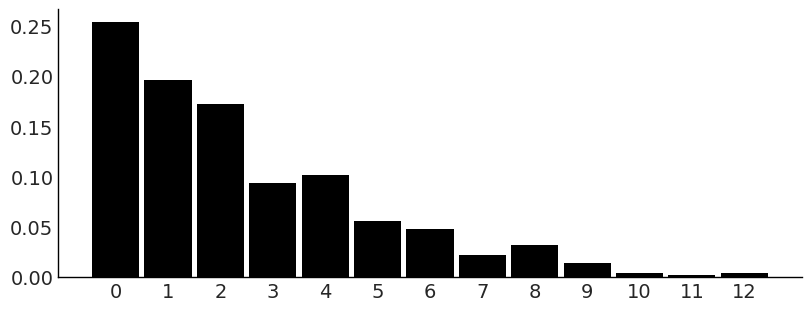

In [27]:
az.plot_dist(azobj.prior['score'], figsize=(8, 3));

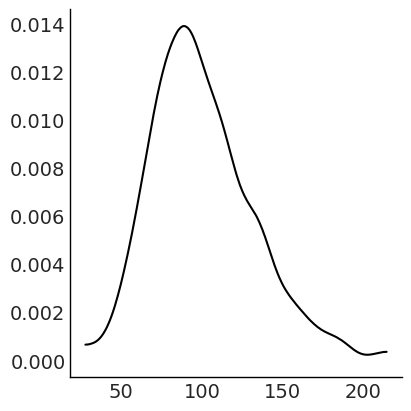

In [28]:
with pm.Model() as model:
    mu = pm.Gamma('mu', 10, 0.1)
    score = pm.Poisson('score', mu)
    prior = pm.sample_prior_predictive()
    azobj = az.from_pymc3(prior=prior)
az.plot_dist(azobj.prior['mu'], figsize=(4, 4));  

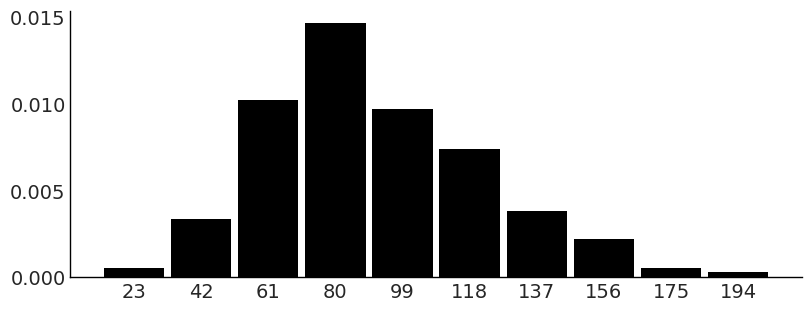

In [29]:
az.plot_dist(azobj.prior['score'], figsize=(8, 3));

### 2M13

In [33]:
# set of 200 0s and 1s 50/50 proportions
obs = np.random.binomial(n=1, p=0.5, size=200)

with pm.Model() as model:
    theta = pm.Beta("theta", 1, 1)
    y = pm.Binomial('y', p=theta, n=1, observed=obs)
    prior = pm.sample_prior_predictive()
    standard_azobj = az.from_pymc3(prior=prior)
    mh_azobj = az.from_pymc3(prior=prior)

In [34]:
with model:
    standard_posterior = pm.sample(return_inferencedata=False)
    mh_posterior = pm.sample(step=pm.Metropolis(), return_inferencedata=False)
    standard_azobj.extend(az.from_pymc3(standard_posterior))
    mh_azobj.extend(az.from_pymc3(mh_posterior))             

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [35]:
standard_azobj  

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data
	> posterior
	> log_likelihood
	> sample_stats

In [36]:
mh_azobj

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data
	> posterior
	> log_likelihood
	> sample_stats

In [39]:
az.summary(standard_azobj)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.535,0.035,0.471,0.6,0.001,0.001,1781.0,2821.0,1.0


In [40]:
az.summary(mh_azobj)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.531,0.035,0.464,0.594,0.001,0.001,582.0,621.0,1.01
